<a href="https://colab.research.google.com/github/Mwadz/Autolib-Hypothesis-Testing/blob/main/Autolib_hypothesis_testind_ip_week4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AUTOLIB CARSHARING HYPOTHESIS TEST
* The documentation on this notebook is to be found [here](https://drive.google.com/drive/folders/1r5dImRwAk5UKeOk-yG0Jb627QscBwcP-?usp=sharing)

# Importing Libraries

In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the dataset

In [83]:
# Loading the Autolib Dataset
autolib = pd.read_csv('/content/autolib_daily_events_postal_code.csv')
# displaying the dataset
autolib.head()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20


In [84]:
# Load the Description Dataset 
autolib_Desc = pd.read_excel('/content/columns_explanation.xlsx')
autolib_Desc

,Column name,explanation
0,Postal code,postal code of the area (in Paris)
1,date,date of the row aggregation
2,n_daily_data_points,number of daily data poinst that were availabl...
3,dayOfWeek,identifier of weekday (0: Monday -> 6: Sunday)
4,day_type,weekday or weekend
5,BlueCars_taken_sum,Number of bluecars taken that date in that area
6,BlueCars_returned_sum,Number of bluecars returned that date in that ...
7,Utilib_taken_sum,Number of Utilib taken that date in that area
8,Utilib_returned_sum,Number of Utilib returned that date in that area
9,Utilib_14_taken_sum,Number of Utilib 1.4 taken that date in that area


# Data Overview

In [85]:
autolib.columns

Index(['Postal code', 'date', 'n_daily_data_points', 'dayOfWeek', 'day_type',
       'BlueCars_taken_sum', 'BlueCars_returned_sum', 'Utilib_taken_sum',
       'Utilib_returned_sum', 'Utilib_14_taken_sum', 'Utilib_14_returned_sum',
       'Slots_freed_sum', 'Slots_taken_sum'],
      dtype='object')

the columns exept 'Postal code' seem to be named correctly but we'll have to make all the column names lowercase and remove spaces.


In [86]:
autolib.shape

(16085, 13)

the data has 16,085 rows and 13 columns

In [87]:
autolib.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16085 entries, 0 to 16084
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Postal code             16085 non-null  int64 
 1   date                    16085 non-null  object
 2   n_daily_data_points     16085 non-null  int64 
 3   dayOfWeek               16085 non-null  int64 
 4   day_type                16085 non-null  object
 5   BlueCars_taken_sum      16085 non-null  int64 
 6   BlueCars_returned_sum   16085 non-null  int64 
 7   Utilib_taken_sum        16085 non-null  int64 
 8   Utilib_returned_sum     16085 non-null  int64 
 9   Utilib_14_taken_sum     16085 non-null  int64 
 10  Utilib_14_returned_sum  16085 non-null  int64 
 11  Slots_freed_sum         16085 non-null  int64 
 12  Slots_taken_sum         16085 non-null  int64 
dtypes: int64(11), object(2)
memory usage: 1.6+ MB


the date column has to be changed to datetime datatype. There seems to be no missing values in the dataset.

# Data Cleaning

In [88]:
# Checking for missing values
null = autolib.isnull().sum().sort_values(ascending = False)
null

Postal code               0
date                      0
n_daily_data_points       0
dayOfWeek                 0
day_type                  0
BlueCars_taken_sum        0
BlueCars_returned_sum     0
Utilib_taken_sum          0
Utilib_returned_sum       0
Utilib_14_taken_sum       0
Utilib_14_returned_sum    0
Slots_freed_sum           0
Slots_taken_sum           0
dtype: int64

Indeed there are no missing values

In [89]:
# changing the date column data type from object to date
autolib['date'] =pd.to_datetime(autolib['date'] ) 
# confirming the change
autolib.dtypes

Postal code                        int64
date                      datetime64[ns]
n_daily_data_points                int64
dayOfWeek                          int64
day_type                          object
BlueCars_taken_sum                 int64
BlueCars_returned_sum              int64
Utilib_taken_sum                   int64
Utilib_returned_sum                int64
Utilib_14_taken_sum                int64
Utilib_14_returned_sum             int64
Slots_freed_sum                    int64
Slots_taken_sum                    int64
dtype: object

In [90]:
# changing the column names
autolib.columns = autolib.columns.str.lower().str.strip().str.replace(' ', '_').str.replace('.', '')
autolib.columns

Index(['postal_code', 'date', 'n_daily_data_points', 'dayofweek', 'day_type',
       'bluecars_taken_sum', 'bluecars_returned_sum', 'utilib_taken_sum',
       'utilib_returned_sum', 'utilib_14_taken_sum', 'utilib_14_returned_sum',
       'slots_freed_sum', 'slots_taken_sum'],
      dtype='object')

In [91]:
# finding out the values in the day_type column
autolib['day_type'].unique()

array(['weekday', 'weekend'], dtype=object)

In [92]:
# Filtering weekday records out cause we dont need them
new_auto = autolib.loc[autolib['day_type'] == 'weekend']
new_auto.head()

,postal_code,date,n_daily_data_points,dayofweek,day_type,bluecars_taken_sum,bluecars_returned_sum,utilib_taken_sum,utilib_returned_sum,utilib_14_taken_sum,utilib_14_returned_sum,slots_freed_sum,slots_taken_sum
5,75001,2018-01-06,1437,5,weekend,187,185,6,6,7,8,38,35
6,75001,2018-01-07,1440,6,weekend,180,180,2,2,10,9,34,34
12,75001,2018-01-13,1440,5,weekend,224,223,2,2,15,15,38,38
13,75001,2018-01-14,1440,6,weekend,193,193,2,2,12,12,22,20
19,75001,2018-01-20,1439,5,weekend,217,217,2,2,25,25,41,39


In [93]:
# dropping the columns we don't need
new_auto.drop((['n_daily_data_points']), axis = 'columns', inplace=True)

In [94]:
# finding out the descriptive stats of the new weekend dataset
new_auto.describe()


,postal_code,dayofweek,bluecars_taken_sum,bluecars_returned_sum,utilib_taken_sum,utilib_returned_sum,utilib_14_taken_sum,utilib_14_returned_sum,slots_freed_sum,slots_taken_sum
count,4541.000000,4541.000000,4541.000000,4541.000000,4541.000000,4541.000000,4541.000000,4541.000000,4541.000000,4541.000000
mean,88794.686633,5.500771,151.090068,152.029289,4.393085,4.414666,10.129707,10.184761,26.909712,26.970932
std,7646.521844,0.500054,218.565642,221.140337,6.747905,6.834645,14.821601,14.973810,61.357605,61.531368
min,75001.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,91330.000000,5.000000,25.000000,24.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
50%,92340.000000,6.000000,59.000000,58.000000,2.000000,2.000000,4.000000,4.000000,0.000000,0.000000
75%,93400.000000,6.000000,156.000000,157.000000,5.000000,5.000000,11.000000,12.000000,6.000000,6.000000
max,95880.000000,6.000000,1352.000000,1332.000000,54.000000,58.000000,100.000000,101.000000,360.000000,359.000000


In [147]:
new_auto['bluecars_taken_sum'].describe()

count    3715.000000
mean      182.494213
std       230.142753
min        19.000000
25%        41.000000
50%        79.000000
75%       213.500000
max      1352.000000
Name: bluecars_taken_sum, dtype: float64

In [95]:
# confirming that the dataset only contains weekend data
new_auto['day_type'].unique()


array(['weekend'], dtype=object)

# Finding and dealing with outliers

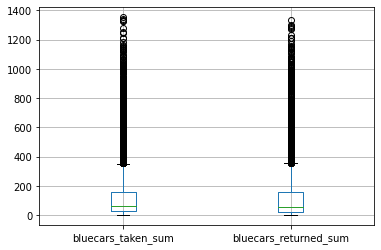

In [96]:
# Checking for Outliers in the Bluecars data
boxplot = new_auto.boxplot(column=['bluecars_taken_sum', 'bluecars_returned_sum'])

In [97]:
#Calculating quantiles for taken bluecars

blue_u  = new_auto['bluecars_taken_sum'].quantile([0.75])
print(blue_u)

blue_l  = new_auto['bluecars_taken_sum'].quantile([0.25])
print(blue_l)


0.75    156.0
Name: bluecars_taken_sum, dtype: float64
0.25    25.0
Name: bluecars_taken_sum, dtype: float64


In [98]:
# Using the upper quantile to drop the vlues beyond that limit
outlier_upper = new_auto[new_auto['bluecars_taken_sum'] > 77].index
autolib.drop(outlier_upper , inplace=True)

In [99]:
# Using the lower quantile to drop the values beyond that limit
outlier_lower = new_auto[new_auto['bluecars_taken_sum'] < 19].index
new_auto.drop(outlier_lower , inplace=True)

In [100]:
# to ignore future warnings
import warnings
warnings.filterwarnings('ignore')

# Exploratory Data Analysis


In [101]:
new_auto.columns

Index(['postal_code', 'date', 'dayofweek', 'day_type', 'bluecars_taken_sum',
       'bluecars_returned_sum', 'utilib_taken_sum', 'utilib_returned_sum',
       'utilib_14_taken_sum', 'utilib_14_returned_sum', 'slots_freed_sum',
       'slots_taken_sum'],
      dtype='object')

In [102]:
# making day of week column a category dt
new_auto['dayofweek'] = new_auto['dayofweek'].astype('category')

# a) Returned Bluecars

In [103]:
#Calculate quantiles
q_auto = new_auto["bluecars_returned_sum"].quantile([0.25,0.5,0.75])
print(q_auto)

0.25     40.0
0.50     79.0
0.75    212.5
Name: bluecars_returned_sum, dtype: float64


In [104]:
# Description of the Blue cars returned sum column 
new_auto['bluecars_returned_sum'].describe()

count    3715.000000
mean      183.509556
std       233.071261
min         8.000000
25%        40.000000
50%        79.000000
75%       212.500000
max      1332.000000
Name: bluecars_returned_sum, dtype: float64

In [105]:
# Finding the mode of the column 'BlueCars_taken_sum'
new_auto['bluecars_returned_sum'].mode()

0    25
dtype: int64

In [106]:
# measures of dispersion
std = new_auto['bluecars_returned_sum'].std()
print('standard deviation: ',std)
skew =new_auto['bluecars_returned_sum'].skew()
print('skew: ',skew)
kurt = new_auto['bluecars_returned_sum'].kurtosis()
print('kurtosis',kurt)

standard deviation:  233.07126124700503
skew:  2.0252990510212325
kurtosis 3.821015252821656


# b) Taken Bluecars


In [107]:
#Calculate quantiles
q_auto = new_auto["bluecars_taken_sum"].quantile([0.25,0.5,0.75])
print(q_auto)

0.25     41.0
0.50     79.0
0.75    213.5
Name: bluecars_taken_sum, dtype: float64


In [108]:
# Description of the Blue cars taken sum column 
new_auto['bluecars_taken_sum'].describe()

count    3715.000000
mean      182.494213
std       230.142753
min        19.000000
25%        41.000000
50%        79.000000
75%       213.500000
max      1352.000000
Name: bluecars_taken_sum, dtype: float64

**Observations**
* the mean value is greater than the median value 
* there's agreat diffeence between the 75th percentile and the maximum taken bluecars

In [109]:
# Finding the mode of the column 'BlueCars_taken_sum'
new_auto['bluecars_taken_sum'].mode()

0    20
dtype: int64

In [110]:
# measures of dispersion
std = new_auto['bluecars_taken_sum'].std()
print('standard deviation: ',std)
skew =new_auto['bluecars_taken_sum'].skew()
print('skew: ',skew)
kurt = new_auto['bluecars_taken_sum'].kurtosis()
print('kurtosis',kurt)

standard deviation:  230.14275300281082
skew:  2.0487359713036892
kurtosis 3.986825627135519


#Univriate Analysis

In [111]:
autolib.columns

Index(['postal_code', 'date', 'n_daily_data_points', 'dayofweek', 'day_type',
       'bluecars_taken_sum', 'bluecars_returned_sum', 'utilib_taken_sum',
       'utilib_returned_sum', 'utilib_14_taken_sum', 'utilib_14_returned_sum',
       'slots_freed_sum', 'slots_taken_sum'],
      dtype='object')

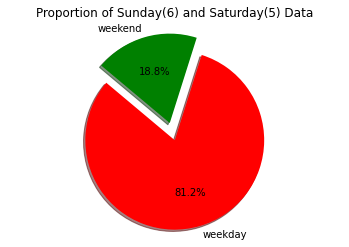

In [112]:
# finding out what percentage of the records were gathered during the wekend vs the weekdays
plt.pie(autolib['day_type'].value_counts(normalize=True), labels =autolib['day_type'].value_counts().index,colors = ['Red', 'Green'], autopct = '%1.1f%%', shadow = True,explode=(0.2,0), startangle = 140)
plt.axis('equal')
plt.title('Proportion of Sunday(6) and Saturday(5) Data')
plt.show()

Most of the carsharing activities captured seem to occur during weekdays but we're more interested in weekend dynamics so we'll go ahead and work on getting more information on car sharing fequency, ratio of taking and returning and locations where activities are most

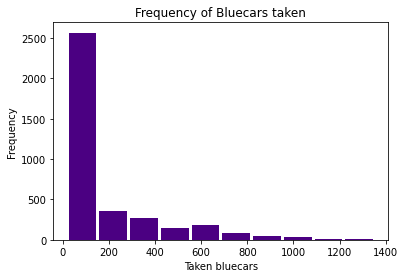

In [113]:
# Visualising the frequency distribution of taken bluecars
blue_tf = new_auto['bluecars_taken_sum']

plt.hist(blue_tf, bins=10, histtype='bar', rwidth=0.9, color='indigo')
plt.xlabel('Taken bluecars')
plt.ylabel('Frequency')
plt.title('Frequency of Bluecars taken')
plt.show()

In [114]:
new_auto.columns

Index(['postal_code', 'date', 'dayofweek', 'day_type', 'bluecars_taken_sum',
       'bluecars_returned_sum', 'utilib_taken_sum', 'utilib_returned_sum',
       'utilib_14_taken_sum', 'utilib_14_returned_sum', 'slots_freed_sum',
       'slots_taken_sum'],
      dtype='object')

# Bivariate Analysis

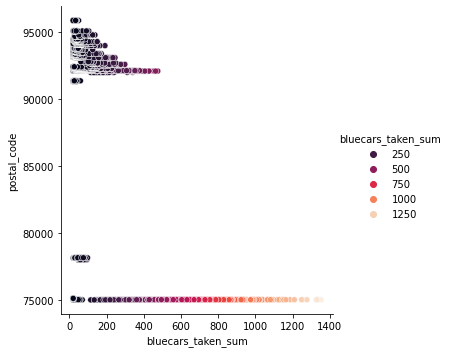

In [115]:
#  Relationship between the postal address to the blue cars taken
ax = sns.relplot(x="bluecars_taken_sum", y="postal_code", hue="bluecars_taken_sum", data = new_auto, palette="rocket",)



* The postal address area around 95000 use the blue car sharing services and use most frequently as well as those around postal address 17000-17015


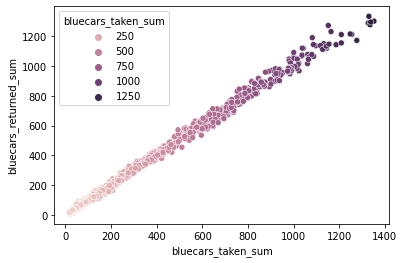

In [116]:
# Relationship between Blue car taken and blue cars returned
sns.scatterplot(data = new_auto, x="bluecars_taken_sum", y="bluecars_returned_sum", hue="bluecars_taken_sum")


* The rate of taking and returning the blue cars was more or less the same which suggests the systems put in place are working quite effectively.


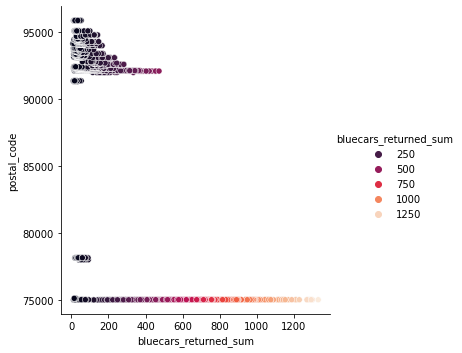

In [117]:
ax = sns.relplot(x="bluecars_returned_sum", y="postal_code", hue="bluecars_returned_sum", data = new_auto, palette="rocket",)


* same observation goes for car return in relation to postal code address

[Text(0, 0.5, 'Day(5/6)'),
 Text(0.5, 0, 'Carsharing'),
 Text(0.5, 1.0, 'Carsharing on weekends')]

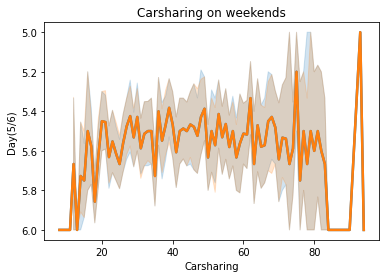

In [146]:
#  Analysing carsharing on weekends 

ax = sns.lineplot(data=new_auto, x = autolib['bluecars_returned_sum'], y = new_auto['dayofweek'] ,  palette="tab10", linewidth=2.5)
ax = sns.lineplot(data=new_auto, x = autolib['bluecars_returned_sum'], y = new_auto['dayofweek'] ,  palette="rocket", linewidth=2.5)

ax.set(xlabel='Carsharing', ylabel='Day(5/6)',
       title='Carsharing on weekends')

# Hypothesis
 
**Null hypothesis (H0)** : The averages of bluecars taken on Saturdays is equal to the averages of bluecars hired on Sundays during the weekend 

**Alternate hypothersis (H1)**: Average bluecars taken on Saturdays is not equal to the averages of bluecars hired on Sundays during the weekend 
that is;

H0: Sunμ = Satμ

H1: Sunμ ≠ Satμ

# Sampling

In [119]:
new_auto.reset_index(drop=True)


,postal_code,date,dayofweek,day_type,bluecars_taken_sum,bluecars_returned_sum,utilib_taken_sum,utilib_returned_sum,utilib_14_taken_sum,utilib_14_returned_sum,slots_freed_sum,slots_taken_sum
0,75001,2018-01-06,5,weekend,187,185,6,6,7,8,38,35
1,75001,2018-01-07,6,weekend,180,180,2,2,10,9,34,34
2,75001,2018-01-13,5,weekend,224,223,2,2,15,15,38,38
3,75001,2018-01-14,6,weekend,193,193,2,2,12,12,22,20
4,75001,2018-01-20,5,weekend,217,217,2,2,25,25,41,39
...,...,...,...,...,...,...,...,...,...,...,...,...
3710,95880,2018-06-02,5,weekend,29,25,1,1,2,3,0,0
3711,95880,2018-06-03,6,weekend,36,33,1,1,2,2,0,0
3712,95880,2018-06-10,6,weekend,34,32,0,0,1,0,0,0
3713,95880,2018-06-16,5,weekend,19,19,0,0,2,1,0,0


In [120]:
# creating a dataframe with sunday records only
sunday = new_auto[(new_auto['dayofweek'] == 6)]

In [121]:
sunday.head(3)

,postal_code,date,dayofweek,day_type,bluecars_taken_sum,bluecars_returned_sum,utilib_taken_sum,utilib_returned_sum,utilib_14_taken_sum,utilib_14_returned_sum,slots_freed_sum,slots_taken_sum
6,75001,2018-01-07,6,weekend,180,180,2,2,10,9,34,34
13,75001,2018-01-14,6,weekend,193,193,2,2,12,12,22,20
20,75001,2018-01-21,6,weekend,143,150,4,4,8,8,23,25


In [122]:
sunblue = sunday['bluecars_taken_sum']
sunblue.head(3)

6     180
13    193
20    143
Name: bluecars_taken_sum, dtype: int64

In [123]:
# creating a dataframe with saturday records only
saturday = new_auto[(new_auto['dayofweek'] == 5)]
saturday.head(3)

,postal_code,date,dayofweek,day_type,bluecars_taken_sum,bluecars_returned_sum,utilib_taken_sum,utilib_returned_sum,utilib_14_taken_sum,utilib_14_returned_sum,slots_freed_sum,slots_taken_sum
5,75001,2018-01-06,5,weekend,187,185,6,6,7,8,38,35
12,75001,2018-01-13,5,weekend,224,223,2,2,15,15,38,38
19,75001,2018-01-20,5,weekend,217,217,2,2,25,25,41,39


In [124]:
satblue = saturday['bluecars_taken_sum']
satblue.head(3)

5     187
12    224
19    217
Name: bluecars_taken_sum, dtype: int64

In [125]:
# sampling our saturday dataset
satsam =satblue.sample(n=50,replace="False")
satsam.shape

(50,)

In [126]:
# sampling our sunday dataset
sunsam =sunblue.sample(n=50,replace="False")
sunsam.shape

(50,)

In [148]:
# checking the means of our two samples
u1= np.mean(satsam)
u2= np.mean(sunsam)
dif = abs(u1-u2)

print(u1,u2,dif)

167.56 175.46 7.900000000000006


* Quite a huge gap

In [135]:
from scipy.stats import shapiro 
# testing for normality
stat, p = shapiro(sunsam)
print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpreting
alpha = 0.05
if p > alpha:
	print("Sunday sample is normally distributed")
else:
	print("Sunday sample isn't normally distributed")

Statistics=0.721, p=0.000
Sunday sample isn't normally distributed


In [134]:
stat, p = shapiro(satsam)
print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpreting
alpha = 0.05
if p > alpha:
	print("Saturday sample is normally distributed")
else:
	print("Saturday sample isn't normally distributed")
 

Statistics=0.616, p=0.000
Saturday sample isn't normally distributed


In [143]:
skew1 =satsam.skew()
skew2 =sunsam.skew()
print('Saturday skew: ',skew1,'|','Sunday skew: ',skew2)

Saturday skew:  2.7479203520692916 | Sunday skew:  2.22805068236492


* both samples are not normally distriuted and are skewed to the right

# Testing

* We'll use wilcoxon signed rank test since it doesn't require data to follow any parametric procedures.

In [127]:
# importing the wilcoxon wilcoxon signed rank test
from scipy.stats import wilcoxon



In [129]:
# comparing the samples
stat, p = wilcoxon(sunsam, satsam)
print('Statistics=%.3f, p=%.3f' % (stat, p))

Statistics=575.000, p=0.546


**Conclusion**
* our level of significance(alpha) is at 5% so alpha is 0.05 
* p in this case stands at 0.546 which is greater than our alpha. 
* This means we fail to reject the null hypothesis.

If the result were less than 0.05 then we would reject the null hypothesis and accept the fact that the mean of bluecars taken on Saturdays is not equal to the average of bluecars taken on Sundays during the weekend.
